# Spatial Distribution of Microlensing Events

With several operational surveys now detecting microlensing events across the sky, it is helpful to examine here where those events are discovered. 

In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactic
from astropy import units as u

import read_events_table

In [4]:
ztf_event_file = './ztf/ztf_event_list.csv'
ogle_event_file = './ogle/ogle_event_list.csv'
gaia_event_file = './gaia/gaia_event_list.csv'
gaia_bh_event_file = './gaia/gaia_bh_event_list.csv'

ztf_events = read_events_table.read_event_list(ztf_event_file)
gaia_events = read_events_table.read_event_list(gaia_event_file)
gaia_bh = read_events_table.read_event_list(gaia_bh_event_file, coords='decimal_deg', ref_frame='icrs')
ogle_events = read_events_table.read_event_list(ogle_event_file)

In [5]:
ztf_positions = SkyCoord(ztf_events['RA'].tolist(), ztf_events['Dec'].tolist(), frame='icrs', unit=(u.hourangle, u.deg))
gaia_positions = SkyCoord(gaia_events['RA'].tolist(), gaia_events['Dec'].tolist(), frame='icrs', unit=(u.hourangle, u.deg))
gaia_bh_positions = SkyCoord(gaia_bh['RA'].tolist(), gaia_bh['Dec'].tolist(), frame='icrs', unit=(u.deg, u.deg))
ogle_positions = SkyCoord(ogle_events['RA'].tolist(), ogle_events['Dec'].tolist(), frame='icrs', unit=(u.hourangle, u.deg))

ztf_positions = ztf_positions.transform_to(Galactic)
gaia_positions = gaia_positions.transform_to(Galactic)
gaia_bh_positions = gaia_bh_positions.transform_to(Galactic)
ogle_positions = ogle_positions.transform_to(Galactic)

Text(0, 0.5, 'N events')

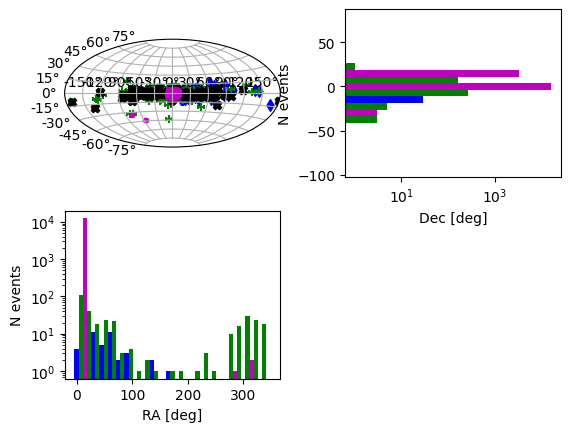

In [6]:
plt.subplot(221, projection='aitoff')
plt.subplots_adjust(wspace=0.3)
plt.grid(True)
plt.scatter(ztf_positions.l.wrap_at('180d').radian, ztf_positions.b.radian, marker='d', c='b')
plt.scatter(gaia_positions.l.wrap_at('180d').radian, gaia_positions.b.radian, marker='+', c='g')
plt.scatter(gaia_bh_positions.l.wrap_at('180d').radian, gaia_bh_positions.b.radian, marker='X', c='k')
plt.scatter(ogle_positions.l.wrap_at('180d').radian, ogle_positions.b.radian, marker='.', c='m')

plt.subplot(222)
plt.hist(ztf_positions.b.deg, bins=np.arange(-90.0, 90.0, 15.0), orientation='horizontal', color='b', 
        log=True, rwidth=0.5, align='left')
plt.hist(gaia_positions.b.deg, bins=np.arange(-90.0, 90.0, 15.0), orientation='horizontal', color='g', 
         log=True, rwidth=0.5, align='mid')
plt.hist(ogle_positions.b.deg, bins=np.arange(-90.0, 90.0, 15.0), orientation='horizontal', color='m', 
         log=True, rwidth=0.5, align='right')
plt.xlabel('Dec [deg]')
plt.ylabel('N events')

plt.subplot(223)
plt.hist(ztf_positions.l.deg, bins=np.arange(0.0, 360.0, 15.0), color='b', log=True, rwidth=0.5, align='left')
plt.hist(gaia_positions.l.deg, bins=np.arange(0.0, 360.0, 15.0), color='g', log=True, rwidth=0.5, align='mid')
plt.hist(ogle_positions.l.deg, bins=np.arange(0.0, 360.0, 15.0), color='m', log=True, rwidth=0.5, align='right')
plt.xlabel('RA [deg]')
plt.ylabel('N events')

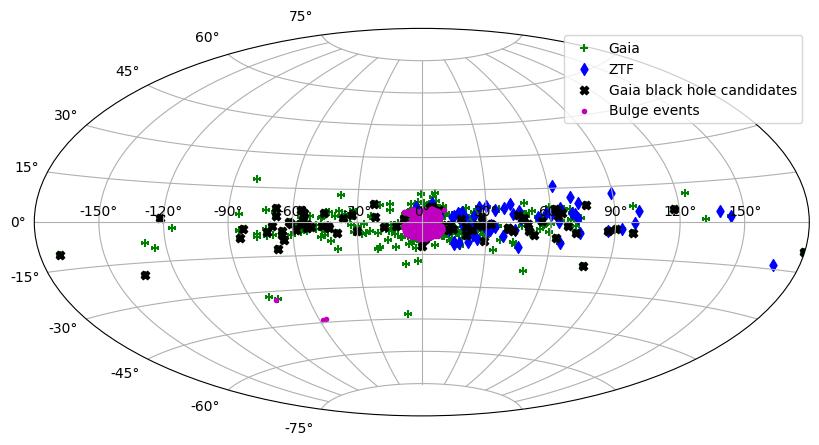

In [12]:
fig = plt.figure(1,(10,10))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gaia_positions.l.wrap_at('180d').radian, gaia_positions.b.radian, marker='+', c='g', label='Gaia')
plt.scatter(ztf_positions.l.wrap_at('180d').radian, ztf_positions.b.radian, marker='d', c='b', label='ZTF')
plt.scatter(gaia_bh_positions.l.wrap_at('180d').radian, gaia_bh_positions.b.radian, marker='X', c='k', label='Gaia black hole candidates')
plt.scatter(ogle_positions.l.wrap_at('180d').radian, ogle_positions.b.radian, marker='.', c='m', label='Bulge events')
plt.legend()
plt.savefig('mulens_event_spatial_distro.png')